Age Wizard
---

Download all the Jupyter notebooks from: https://github.com/HeloiseS/hoki/tree/master/tutorials

#  Initial imports

In [1]:
from hoki.age_utils import AgeWizard
import hoki
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('tuto.mplstyle')

# A modern ageing method 
## _The science behind the code_

### Motivation
One of the classic methods for ageing clusters is to fit isochrones to observational data in Colour-Magnitude Diagrams (CMDs)  or in Hertzsprung-Russel Diagrams (HRDs).

There are a number of issues with this ubiquitous technique though:

* Fitting is usually done by eye
* They only take into account single stars
* It cannot be used if your sample only contains a few sources

**Our goal is to provide a method that answers all of the issues metioned above**

### How it works

By matching the observed properties of your sources to the BPASS models you can find the **most likely age** of a **location on the HRD/CMD**.


<img src="age_method.png" alt="Drawing" style="width: 1000px;"/>

If all your sources belong to the same region, you can then combine the PDFs of your individual sources to find the age PDF of the whole cluster.

All of this can be done step by step using the chain `find_coordinates()` -> `calculate_pdfs` -> `multiply_pdfs()`, or you could simply use `AgeWizard()` which handles this pipeline and facilitates loading in the models. 

Note: In this tutorial we will focus on `AgeWizard()`.


### Remember to exercise caution in your interpretation

This is true of all methods but it is worth repeating. This technique helps you get to the answer, but it doesn't give you the answer. 

The **most likely age** of the **matching location** is not necessarily the age of your source - as we'll see below Helium Stars created through binary interactions and envelope stripping are found at similar locations as WR stars but at different ages.

# Ages from Hertzsprung-Russell Diagram

First, we need some observational data to compare to our models. 

`AgeWizard()` expects a `pandas.DataFrame`. If you want to use the HRD capabilities you will need to provide a `logT` and a `logL` column:
* logT: log10 of the stellar effective temperature
* logL: log10 of the stellar luminosity **in units of Solar Luminosities**

Additionally, your DataFrame will ideally contain a `name` column  with the name of the sources you're working on. If you don't provide one, `AgeWizard()` will make it's own sources names: source1, source2, etc...

_Data source: McLeod et al. 2019, Stevance et al. in prep._

In [2]:
stars = pd.DataFrame.from_dict({'name':np.array(['Star1','Star2','Star3','Star4', 
                                                 'Star5','Star6','Star7','Star8','Star9',
                                                 'Star10','Star11','Star12','Star13','Star14', 
                                                 'WR1', 'WR2']),
                                'logL':np.array([5.0, 5.1, 4.9, 5.9, 5.0, 5.4, 4.3, 5.7, 4.5, 4.5, 
                                                 4.9, 4.5, 4.3, 4.5, 5.3, 5.3]), 
                                'logT':np.array([4.48, 4.45, 4.46, 4.47, 4.48, 4.53, 4.52, 4.52, 4.52,
                                                 4.56, 4.46, 4.52, 4.52, 4.52, 4.9, 4.65])})

Now we initialise our `AgeWizard()`. Each instance corresponds to one model and one model only: i.e. 1 IMF and 1 metalicity.

If we want to have a look at 2 different metallicities for example, we can just instanciate `AgeWizard` twice:

In [3]:
agewiz006 = AgeWizard(obs_df=stars, model='./data/hrs-bin-imf135_300.z006.dat')
agewiz008 = AgeWizard(obs_df=stars, model='./data/hrs-bin-imf135_300.z008.dat')

During instanciation, the observations and models are matched and the age PDFs are calculated. They are summarised in a `pandas.DataFrame` that you can access as follows. 

In [4]:
agewiz006.pdfs.head(15)

name,Star1,Star2,Star3,Star4,Star5,Star6,Star7,Star8,Star9,Star10,Star11,Star12,Star13,Star14,WR1,WR2,time_bins
0,0.000000,0.000000,0.000000,1.298460e-11,0.000000,0.000000,0.025706,5.594794e-11,0.021803,0.000000e+00,0.000000,0.021803,0.025706,0.021803,0.000000e+00,0.107142,6.0
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.036928,0.000000e+00,0.030149,0.000000e+00,0.000000,0.030149,0.036928,0.030149,0.000000e+00,0.004603,6.1
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.046310,0.000000e+00,0.035243,0.000000e+00,0.000000,0.035243,0.046310,0.035243,0.000000e+00,0.006676,6.2
3,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.058174,0.000000e+00,0.052005,7.820472e-08,0.000000,0.052005,0.058174,0.052005,0.000000e+00,0.012032,6.3
4,0.000000,0.000000,0.000654,0.000000e+00,0.000000,0.000000,0.081692,0.000000e+00,0.057408,1.012331e-04,0.000654,0.057408,0.081692,0.057408,0.000000e+00,0.003365,6.4
5,0.000000,0.000000,0.015330,7.629112e-01,0.000000,0.000000,0.063921,4.216232e-03,0.074740,9.941176e-07,0.015330,0.074740,0.063921,0.074740,4.525980e-08,0.009378,6.5
6,0.075321,0.011572,0.142812,1.100859e-01,0.075321,0.003387,0.078904,2.914504e-01,0.086366,1.476180e-04,0.142812,0.086366,0.078904,0.086366,0.000000e+00,0.000145,6.6
7,0.238335,0.430026,0.233166,8.879082e-02,0.238335,0.558455,0.135883,4.335802e-01,0.093930,1.763084e-03,0.233166,0.093930,0.135883,0.093930,2.155362e-14,0.015148,6.7
8,0.295138,0.348300,0.279178,2.892240e-02,0.295138,0.345761,0.187286,1.529185e-01,0.147844,4.403392e-03,0.279178,0.147844,0.187286,0.147844,3.207127e-01,0.023512,6.8
9,0.324156,0.153717,0.267386,9.289685e-03,0.324156,0.044554,0.176904,8.005393e-02,0.204892,1.732683e-02,0.267386,0.204892,0.176904,0.204892,5.301331e-01,0.745544,6.9


But those are just numbers... PDFs are meant to be plotted:

In [5]:
def plot_all_pdfs(agewiz):
    # creating the figure
    f, ax = plt.subplots(4, 4, figsize=(15,15))
    plt.subplots_adjust(hspace=0.4)
    axes = ax.reshape(16)

    # We plot each star an individual axis 
    for source, axis in zip(agewiz.sources, axes):
        
        # Plotting one PDF
        axis.step(hoki.BPASS_TIME_BINS, agewiz.pdfs[source],where='mid')
        axis.fill_between(hoki.BPASS_TIME_BINS, agewiz.pdfs[source], step='mid', alpha=0.3)
        
        # Labels and limits
        axis.set_title(source)
        axis.set_ylabel('Probability (%)')
        axis.set_xlabel('log(years)')
        axis.set_ylim([0,0.6])    
        axis.set_xlim([6,8.5])     
    

### Age PDFs at z=0.006

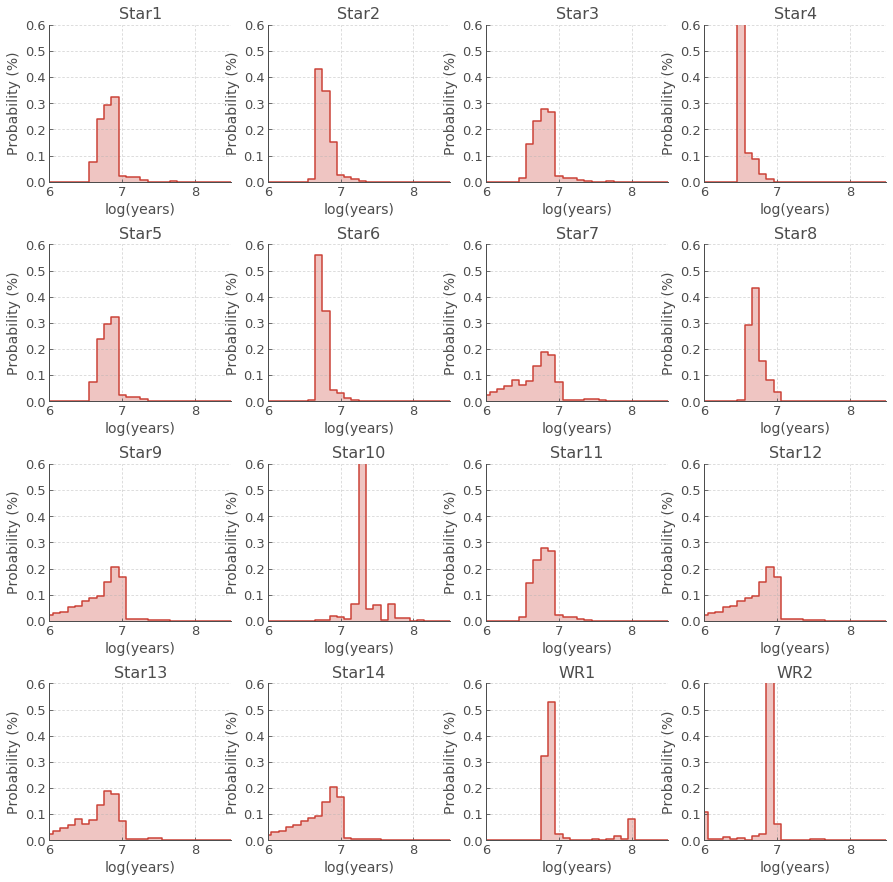

In [6]:
plot_all_pdfs(agewiz006)

### Age PDFs at z=0.008

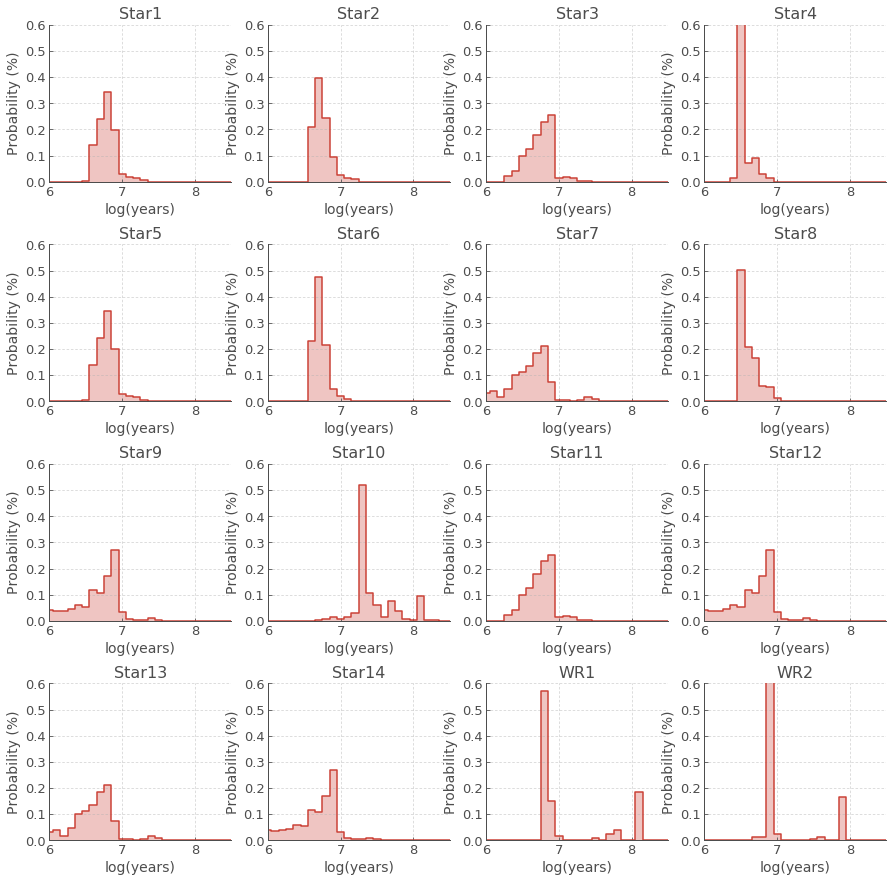

In [7]:
plot_all_pdfs(agewiz008)

## Most Likely Ages

The most likely age for **each source** is summarised by `AgeWizard.most_likely_ages`. This is returned as a numpy array.

In [8]:
agewiz006.most_likely_ages

array([6.9, 6.7, 6.8, 6.5, 6.9, 6.7, 6.8, 6.7, 6.9, 7.3, 6.8, 6.9, 6.8,
       6.9, 6.9, 6.9])

Different metallicities will give different results. In this example we summarise our results into a new DataFrame:

In [9]:
most_likely_ages = pd.DataFrame.from_dict({'name': agewiz006.sources, 
                                           'z006': agewiz006.most_likely_ages, 
                                           'z008': agewiz008.most_likely_ages}) 

# Note that the attribute AgeWizard.sources is the list of names you provided, or if you didn't the ones it created

In [10]:
most_likely_ages

,name,z006,z008
0,Star1,6.9,6.8
1,Star2,6.7,6.7
2,Star3,6.8,6.9
3,Star4,6.5,6.5
4,Star5,6.9,6.8
5,Star6,6.7,6.7
6,Star7,6.8,6.8
7,Star8,6.7,6.5
8,Star9,6.9,6.9
9,Star10,7.3,7.3


### IMPORTANT
The `most_likely_ages` (and `most_likley_age`, see below) tools **do not give you a direct answer** - they are a way to summarise the data and be used in your interpretation but **please do not use these as a black box**.

Looking at the PDFs plotted above and the table of most likely ages, we can see that a few stars stand out:

* Star 4 has a lower (most likely) age than the rest of the sample
* Star 10 has a higher (most likely) age than the rest of the sample
* The WR PDFs show peaks beyond log(age/years) - which souldn't be possible for WR stars.

All of these are discussed an interpreted in details in Stevance et al. (in prep). Star 4 is an example of a star that is probably the result of a merger and rejuvination, Star 10 is more likely to be on the young tail of the distribution and not as old as the most likley age implies, and the WR stars share their HRD locations with helium stars which appear at later times, which populate the later peak. 


## Plotting Aggregate Ages

If you are looking for the age of a whole population then you can ask `AgeWizard` to combine the PDFs it calcualted on initialisation. This is done with the method `AgeWizard.multiply_pdfs()`. 

It can be called as such and it will multiply all the PDFs, or you can provide a list of columns to ignore in the paramter `not_you`. You can also ask it to return the resulting PDF by setting `return_df` to True. If you don't, it will store the result in `AgeWizard.multiplied_pdfs`.

In [11]:
# Returns None
agewiz006.multiply_pdfs()

In [12]:
agewiz006.multiplied_pdf.head(10)

,pdf
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,0.000000e+00
7,2.988798e-15
8,1.617420e-01
9,8.382580e-01


You can also quickly retrieve the **most likely age of the whole sample** from the PDF you just calculated using `AgeWizard.most_likely_age`.

In [13]:
agewiz006.most_likely_age

array([6.9])

In [14]:
# Or return directly
agewiz008.multiply_pdfs(return_df=True).head(10)

,pdf
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
5,0.000000e+00
6,3.732168e-10
7,1.615225e-05
8,7.631986e-01
9,2.367853e-01


In [15]:
agewiz008.most_likely_age

array([6.8])

Down below we create a quick function to plot our aggregate ages for z=0.006 and z=0.008. We show two PDFs - one that includes the WR star and one that doesn't.

In [16]:
outliers=['Star4', 'Star10']
WRs=['WR1', 'WR2']

In [17]:
def plot_aggregate_age(agewiz, ax):
    
    # Aggregate age PDF for all sources
    withWR = agewiz.multiply_pdfs(not_you=outliers, return_df=True).pdf
    
    # Aggregate age PDF for sources excluding the WR star
    withoutWR = agewiz.multiply_pdfs(not_you=outliers+WRs, return_df=True).pdf

    ax.step(hoki.BPASS_TIME_BINS, withoutWR, where='mid',alpha=0.5)
    ax.fill_between(hoki.BPASS_TIME_BINS,  withoutWR, step='mid', alpha=0.2, label='Without WR stars')
    
    ax.step(hoki.BPASS_TIME_BINS, withWR, where='mid', alpha=0.7)
    ax.fill_between(hoki.BPASS_TIME_BINS,  withWR, step='mid', alpha=0.3,  label='With WR stars')


    ax.set_ylabel('Probability (%)')
    ax.set_xlabel('log(ages)')

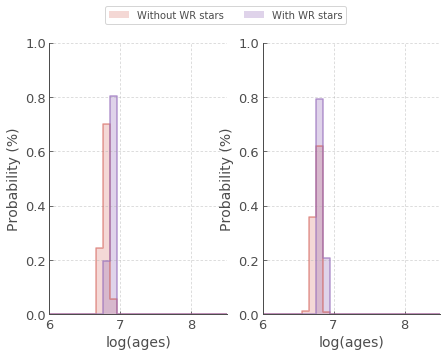

In [18]:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(7,5))

plot_aggregate_age(agewiz006, ax[0])
plot_aggregate_age(agewiz008, ax[1])

for axis in ax:
    axis.set_ylim([0,1])
    axis.set_xlim([6,8.5])
    
# Cool legend
ax[0].legend(fontsize=10, loc='center right', bbox_to_anchor=(1.7, 1.1), ncol=2)

## Probability given an age range

The BPASS time bins are separated by 0.1 dex in log space (log(age/years) = 6.0, 6.1, 6.2, 6.3 etc..) and the PDFs for your individual sources will cover a range of BPASS time bins.

Consequently, giving a single age may not make a lot of sense. Also the PDFs will rarely, if ever, resemble a Gaussian distribution: that means that you can't give an error bar in the "classical" sense. 

Another interesting measure is the probability that the age of your star falls into a chosen age range. 
In this case our aggregate age is most likely to be between 6.7-6.9, so let's investigate how likely it is for each individual star to fall in that range. 

For that we use `AgeWizard.calculate_p_given_age_range()` which returns a 1D array containing the probabilities corresponding to each source.

In [19]:
agewiz006.calculate_p_given_age_range([6.7, 6.9])

array([0.85762972, 0.9320426 , 0.77972922, 0.12700291, 0.85762972,
       0.94877034, 0.50007266, 0.66655266, 0.44666606, 0.02349331,
       0.77972922, 0.44666606, 0.50007266, 0.44666606, 0.85084574,
       0.78420389])

We can collate those in one single DataFrame

In [20]:
p_ages_679 = pd.DataFrame.from_dict({'name': agewiz006.sources, 
                                     'z006': agewiz006.calculate_p_given_age_range([6.7,6.9]), 
                                     'z008': agewiz008.calculate_p_given_age_range([6.7,6.9])}) 

In [21]:
p_ages_679

,name,z006,z008
0,Star1,0.857630,0.784335
1,Star2,0.932043,0.737951
2,Star3,0.779729,0.659319
3,Star4,0.127003,0.134967
4,Star5,0.857630,0.784335
5,Star6,0.948770,0.738479
6,Star7,0.500073,0.469008
7,Star8,0.666553,0.278005
8,Star9,0.446666,0.549145
9,Star10,0.023493,0.023109


To learn more about how we use and interpret this statistic, you can checkout Stevance et al. in prep an the associated Jupyter Notebook (link)

# Ages from Colour-Magnitude Diagram 

[TO WRITE]